In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from sklearn.linear_model import Lasso
import scipy.io as sio
from sklearn.metrics import mean_squared_error
from scipy.integrate import solve_ivp
from scipy.stats import linregress as LinReg
from scipy.signal import savgol_filter
import math as m


import os
import datetime


import pysindy as ps

# Ignore matplotlib deprecation warnings
import warnings
warnings.filterwarnings("ignore", category=UserWarning)



In [2]:
# fodder

In [3]:
### Set pathnames, filenames; choose data


pathname = '/Users/josephwilliams/Documents/Data_Results/DDC of UF/Dated Entries/2022_09_01 Coarse-Grained Data from IBPM/Re050/'
# pathname = '/Users/josephwilliams/Documents/Data_Results/DDC of UF/Dated Entries/2022_09_01 Coarse-Grained Data from IBPM/Re062/'
# pathname = '/Users/josephwilliams/Documents/Data_Results/DDC of UF/Dated Entries/2022_09_01 Coarse-Grained Data from IBPM/Re100/'

filename = 'UVomg_yavg.mat'
CGLE = sio.loadmat( pathname+filename )


# data_choice_string = 'U_cg_tot'
# data_choice_string = 'V_cg_tot'
data_choice_string = 'W_cg_tot'




In [4]:
# fodder

In [5]:



data = np.real(CGLE[data_choice_string])

# data = np.sqrt( u_CG**2 + v_CG**2 )


Re = CGLE['Re'][0][0]
dt = CGLE['dt'][0][0]
dx = CGLE['dx'][0][0]
x = CGLE['x'][0]
t = CGLE['t'][0]



### Normalize the data to min/max = +/- 1
data = data / np.max(np.max( np.abs(data) ))


# Compute time derivatives

# data_dt    = ps.FiniteDifference(axis=1)._differentiate(data   , dt)
# data_dt_dt = ps.FiniteDifference(axis=1)._differentiate(data_dt, dt)


### Time-Delay Embed
TD_Embed = 2

t_1 = t
t_2 = t+TD_Embed
TD_Embed_Index = np.argmin( np.abs(t - TD_Embed) )
TD_Embed_backendIndex = np.argmin( np.abs( t_2 - np.max(t_1) ) ) 

data_1 = data[: , TD_Embed_Index:-1 ]
data_2 = data[: , 0:TD_Embed_backendIndex ]
t_Ovlp = t[TD_Embed_Index:-1]



data_1_dt = ps.FiniteDifference(axis=1)._differentiate(data_1   , dt)
data_2_dt = ps.FiniteDifference(axis=1)._differentiate(data_2   , dt)




In [6]:
### fodder

In [7]:
t_Ovlp

array([2.  , 2.02, 2.04, 2.06, 2.08, 2.1 , 2.12, 2.14, 2.16, 2.18, 2.2 ,
       2.22, 2.24, 2.26, 2.28, 2.3 , 2.32, 2.34, 2.36, 2.38, 2.4 , 2.42,
       2.44, 2.46, 2.48, 2.5 , 2.52, 2.54, 2.56, 2.58, 2.6 , 2.62, 2.64,
       2.66, 2.68, 2.7 , 2.72, 2.74, 2.76, 2.78, 2.8 , 2.82, 2.84, 2.86,
       2.88, 2.9 , 2.92, 2.94, 2.96, 2.98, 3.  , 3.02, 3.04, 3.06, 3.08,
       3.1 , 3.12, 3.14, 3.16, 3.18, 3.2 , 3.22, 3.24, 3.26, 3.28, 3.3 ,
       3.32, 3.34, 3.36, 3.38, 3.4 , 3.42, 3.44, 3.46, 3.48, 3.5 , 3.52,
       3.54, 3.56, 3.58, 3.6 , 3.62, 3.64, 3.66, 3.68, 3.7 , 3.72, 3.74,
       3.76, 3.78, 3.8 , 3.82, 3.84, 3.86, 3.88, 3.9 , 3.92, 3.94, 3.96,
       3.98, 4.  , 4.02, 4.04, 4.06, 4.08, 4.1 , 4.12, 4.14, 4.16, 4.18,
       4.2 , 4.22, 4.24, 4.26, 4.28, 4.3 , 4.32, 4.34, 4.36, 4.38, 4.4 ,
       4.42, 4.44, 4.46, 4.48, 4.5 , 4.52, 4.54, 4.56, 4.58, 4.6 , 4.62,
       4.64, 4.66, 4.68, 4.7 , 4.72, 4.74, 4.76, 4.78, 4.8 , 4.82, 4.84,
       4.86, 4.88, 4.9 , 4.92, 4.94, 4.96, 4.98, 5.

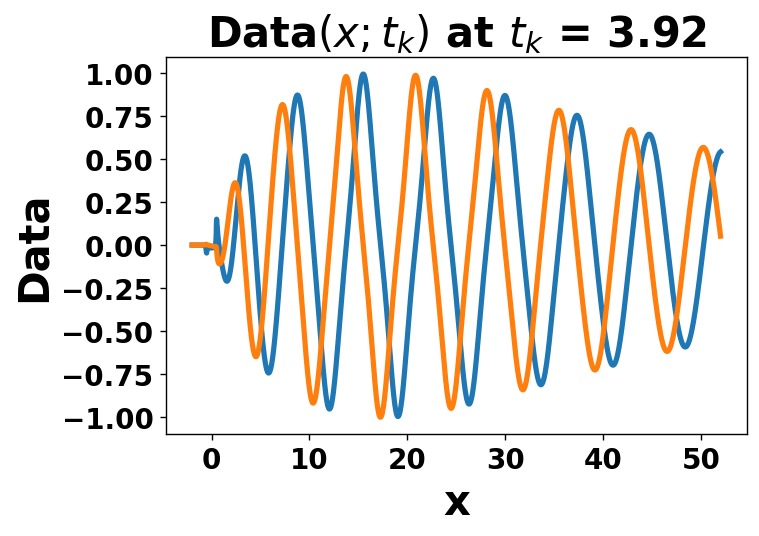

In [8]:
## Plot (data, d/dt, d2/dt2) for all SPACE for chosen time

tplot1 = 96


plt.figure(dpi=125)
plt.plot(x[1:-1], data_1[:, tplot1], linewidth=3)
plt.plot(x[1:-1], data_2[:, tplot1], linewidth=3)
ttl_str = 'Data$(x; t_k)$ at $t_k$ = ' + str( np.round( t_Ovlp[tplot1], 2) )
plt.title(ttl_str, fontsize=24, weight='bold')
plt.xticks(fontsize=16, weight='bold')
plt.yticks(fontsize=16, weight='bold')
plt.xlabel('x', fontsize=24, weight='bold')
plt.ylabel('Data', fontsize=24, weight='bold')
plt.show()



In [9]:
### fodder

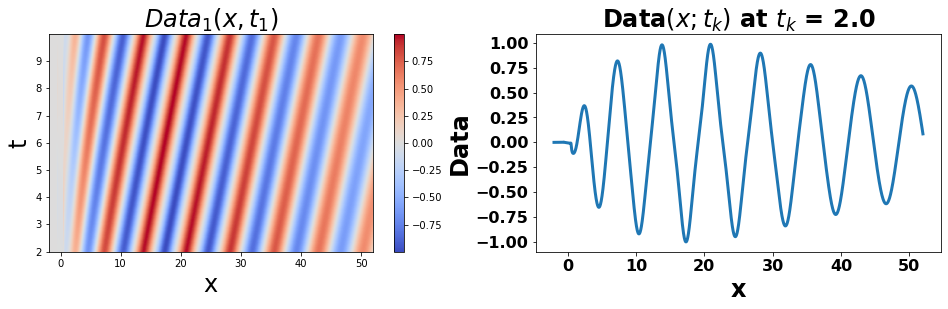

In [10]:

tplot1 = 0



plt.show()


fl_xtOvlp_mshgrd, fl_txOvlp_mshgrd = np.meshgrid(x[1:-1], t_Ovlp)

plt.figure(figsize=(16, 4))

plt.subplot(1, 2, 1)
# plt.figure(dpi = 100) 
# plt.pcolormesh(fl_xtOvlp_mshgrd, fl_txOvlp_mshgrd, data[: , TD_Embed_Index:-1 ].T, cmap='coolwarm')
plt.pcolormesh(fl_xtOvlp_mshgrd, fl_txOvlp_mshgrd, data_1.T, cmap='coolwarm')
plt.xlabel('x', fontsize=24)
plt.ylabel('t', fontsize=24)
ttl_str = r'$Data_1(x,t_1)$'
plt.title(ttl_str, fontsize=24)
plt.colorbar()

plt.subplot(1, 2, 2)
plt.plot(x[1:-1], data_1[:, tplot1], linewidth=3)
ttl_str = 'Data$(x; t_k)$ at $t_k$ = ' + str( np.round( t_Ovlp[tplot1], 2) )
plt.title(ttl_str, fontsize=24, weight='bold')
plt.xticks(fontsize=16, weight='bold')
plt.yticks(fontsize=16, weight='bold')
plt.xlabel('x', fontsize=24, weight='bold')
plt.ylabel('Data', fontsize=24, weight='bold')


plt.show()




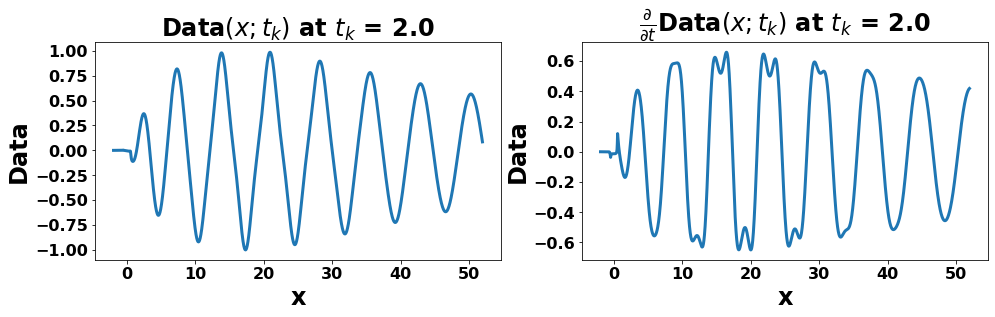

In [11]:

tplot1 = 0



plt.show()


fl_xtOvlp_mshgrd, fl_txOvlp_mshgrd = np.meshgrid(x[1:-1], t_Ovlp)

plt.figure(figsize=(16, 4))

plt.subplot(1, 2, 1)
plt.plot(x[1:-1], data_1[:, tplot1], linewidth=3)
# plt.plot(x[1:-1], data_2[:, tplot1], linewidth=3)
ttl_str = 'Data$(x; t_k)$ at $t_k$ = ' + str( np.round( t_Ovlp[tplot1], 2) )
plt.title(ttl_str, fontsize=24, weight='bold')
plt.xticks(fontsize=16, weight='bold')
plt.yticks(fontsize=16, weight='bold')
plt.xlabel('x', fontsize=24, weight='bold')
plt.ylabel('Data', fontsize=24, weight='bold')

plt.subplot(1, 2, 2)
plt.plot(x[1:-1], data_1_dt[:, tplot1], linewidth=3)
# plt.plot(x[1:-1], data_2_dt[:, tplot1], linewidth=3)
ttl_str = r'$\frac{\partial }{\partial t}$Data$(x; t_k)$ at $t_k$ = ' + str( np.round( t_Ovlp[tplot1], 2) )
plt.title(ttl_str, fontsize=24, weight='bold')
plt.xticks(fontsize=16, weight='bold')
plt.yticks(fontsize=16, weight='bold')
plt.xlabel('x', fontsize=24, weight='bold')
plt.ylabel('Data', fontsize=24, weight='bold')


plt.show()
 



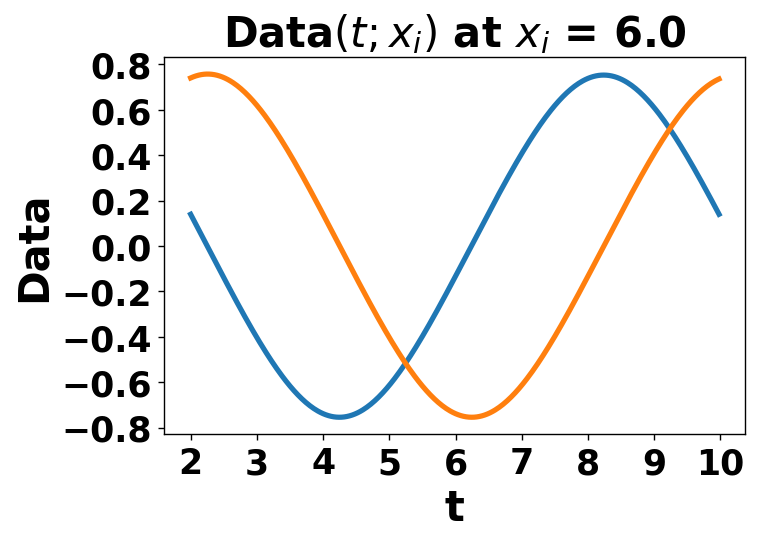

In [12]:
## Plot (data, d/dt, d2/dt2) for all TIME for chosen space

### LHS boundary
# xplot1 = 0      # x = -0.98  
# xplot1 = 50     # x = 
# xplot1 = 100    # x = 
# xplot1 = 200      # x = 6.02
xplot1 = 399      # x = 800
# xplot1 = 599      # x = 10
# xplot1 = 800    # x = 14.02
# xplot1 = 1000     # x = 18.02
# xplot1 = 1250   # x = 23.02
# xplot1 = 2698   # x = 51.98


##

plt.figure(dpi=125)
plt.plot(t_Ovlp, data_1[xplot1, :], linewidth=3)
plt.plot(t_Ovlp, data_2[xplot1, :], linewidth=3)

ttl_str = 'Data$(t; x_i)$ at $x_i$ = ' + str( np.round( x[1+xplot1], 2) )
plt.title(ttl_str, fontsize=24, weight='bold')
plt.xticks(fontsize=20, weight='bold')
plt.yticks(fontsize=20, weight='bold')
plt.xlabel('t', fontsize=24, weight='bold')
plt.ylabel('Data', fontsize=24, weight='bold')
plt.show()



In [13]:
### fodder

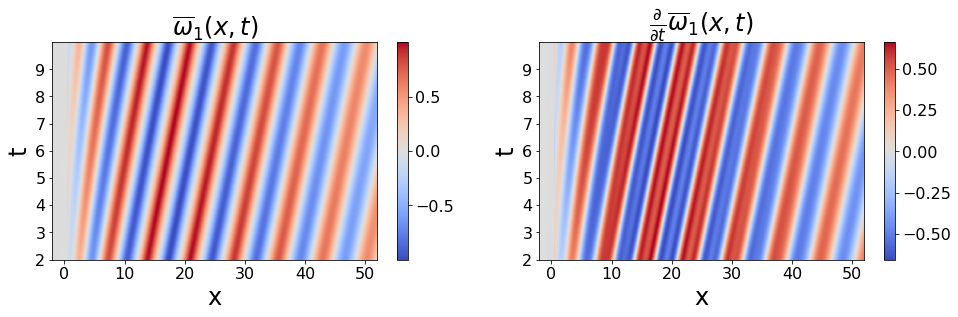

In [14]:
### Colorplots

fl_xtOvlp_mshgrd, fl_txOvlp_mshgrd = np.meshgrid(x[1:-1], t_Ovlp)

plt.figure(figsize=(16, 4))

plt.subplot(1, 2, 1)
# plt.figure(dpi = 100) 
# plt.pcolormesh(fl_xtOvlp_mshgrd, fl_txOvlp_mshgrd, data[: , TD_Embed_Index:-1 ].T, cmap='coolwarm')
plt.pcolormesh(fl_xtOvlp_mshgrd, fl_txOvlp_mshgrd, data_1.T, cmap='coolwarm')
plt.xlabel('x', fontsize=24)
plt.ylabel('t', fontsize=24)
# ttl_str = r'$Data_1(x,t_1)$'
ttl_str = r'$\overline{\omega}_1(x,t)$'
plt.title(ttl_str, fontsize=24)
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)


plt.subplot(1, 2, 2)
plt.pcolormesh(fl_xtOvlp_mshgrd, fl_txOvlp_mshgrd, data_1_dt.T, cmap='coolwarm')
plt.xlabel('x', fontsize=24)
plt.ylabel('t', fontsize=24)
# ttl_str = r'$Data_2(x,t_2)$'
ttl_str = r'$\frac{\partial}{\partial t} \overline{\omega}_1(x,t)$'
plt.title(ttl_str, fontsize=24)
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.show()



In [15]:
### fodder



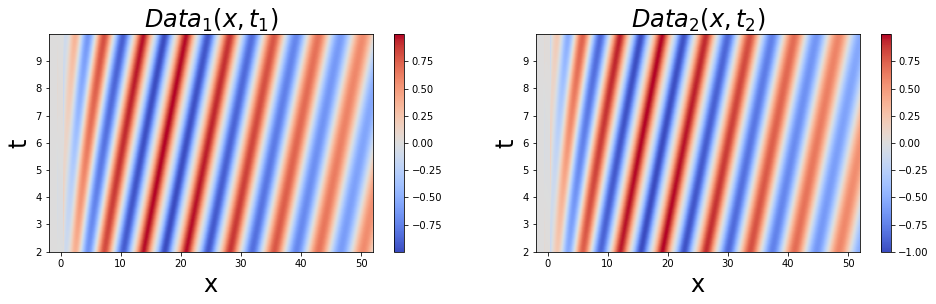

In [16]:
### Colorplots

fl_xtOvlp_mshgrd, fl_txOvlp_mshgrd = np.meshgrid(x[1:-1], t_Ovlp)

plt.figure(figsize=(16, 4))

plt.subplot(1, 2, 1)
# plt.figure(dpi = 100) 
# plt.pcolormesh(fl_xtOvlp_mshgrd, fl_txOvlp_mshgrd, data[: , TD_Embed_Index:-1 ].T, cmap='coolwarm')
plt.pcolormesh(fl_xtOvlp_mshgrd, fl_txOvlp_mshgrd, data_1.T, cmap='coolwarm')
plt.xlabel('x', fontsize=24)
plt.ylabel('t', fontsize=24)
ttl_str = r'$Data_1(x,t_1)$'
plt.title(ttl_str, fontsize=24)
plt.colorbar()

plt.subplot(1, 2, 2)
plt.pcolormesh(fl_xtOvlp_mshgrd, fl_txOvlp_mshgrd, data_2.T, cmap='coolwarm')
plt.xlabel('x', fontsize=24)
plt.ylabel('t', fontsize=24)
ttl_str = r'$Data_2(x,t_2)$'
plt.title(ttl_str, fontsize=24)
plt.colorbar()


plt.show()



In [17]:
%%javascript
require("notebook/js/notebook").Notebook.prototype.scroll_to_bottom = function () {}

<IPython.core.display.Javascript object>

In [18]:


# ### x = [2, 51.98]
# x_trnc_pt_a = 199
# x_trnc_pt_b = 2698


### Sam Rudy subdomain
# ## x = [2, 9]
# x_trnc_pt_a = 199
# x_trnc_pt_b = 549



### x = [15, 22]
# x_trnc_pt_a = 849
# x_trnc_pt_b = 1199


# ### x = [45, 51.98]
# x_trnc_pt_a = 2349
# x_trnc_pt_b = 2698




In [19]:
### Set the x-truncation point
### Subdomains, widths of 5


### x = [2, 7]
x_trnc_pt_a = 199
x_trnc_pt_b = 449


### x = [7, 12]
# x_trnc_pt_a = 449
# x_trnc_pt_b = 699


### x = [12, 17]
# x_trnc_pt_a = 699
# x_trnc_pt_b = 949


### x = [17, 22]
# x_trnc_pt_a = 949
# x_trnc_pt_b = 1199


### x = [22, 27]
# x_trnc_pt_a = 1199
# x_trnc_pt_b = 1449


### x = [27, 32]
# x_trnc_pt_a = 1449
# x_trnc_pt_b = 1699


### x = [32, 37]
# x_trnc_pt_a = 1699
# x_trnc_pt_b = 1949


### x = [37, 42]
# x_trnc_pt_a = 1949
# x_trnc_pt_b = 2199


### x = [42, 47]
# x_trnc_pt_a = 2199
# x_trnc_pt_b = 2449


### x = [47, 51]
# x_trnc_pt_a = 2449
# x_trnc_pt_b = 2649


### x = [47, 51.98]
# x_trnc_pt_a = 2449
# x_trnc_pt_b = 2698


In [20]:
### Create the truncated space vector


x_PF = x[1+x_trnc_pt_a:1+x_trnc_pt_b+1]
xt_mshgrd, tx_mshgrd = np.meshgrid(x_PF , t_Ovlp)
n_X_PF = x_trnc_pt_b - x_trnc_pt_a + 1

print('n_X_PF = ' + str(n_X_PF) )
print('x_a = ' + str(x[1+x_trnc_pt_a]))
print('x_b = ' + str(x[1+x_trnc_pt_b]))



# Create the data and d/dt data matrices for PDE-FIND

u              = np.zeros( ( n_X_PF , len(t_Ovlp), 2) )
u[:, :, 0]     = data_1[ x_trnc_pt_a:x_trnc_pt_b+1 , : ]
u[:, :, 1]     = data_2[ x_trnc_pt_a:x_trnc_pt_b+1 , : ]

u_dot          = np.zeros( ( n_X_PF , len(t_Ovlp), 2) )
u_dot[:, :, 0] = data_1_dt[ x_trnc_pt_a:x_trnc_pt_b+1 , : ]
u_dot[:, :, 1] = data_2_dt[ x_trnc_pt_a:x_trnc_pt_b+1 , : ]





n_X_PF = 251
x_a = 2.0000000000000036
x_b = 7.000000000000007


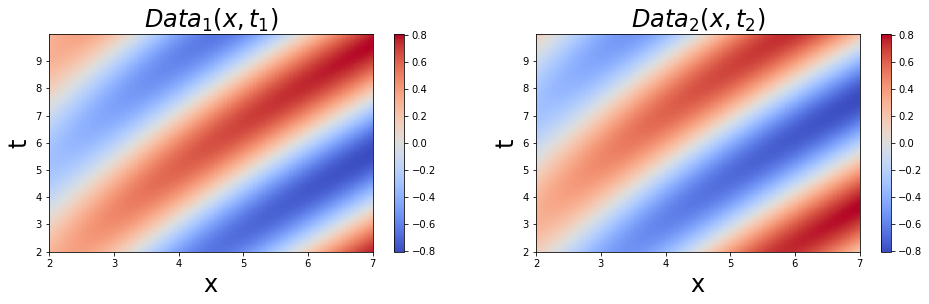

In [21]:

xt_mshgrd, tx_mshgrd = np.meshgrid(x_PF , t_Ovlp)



plt.figure(figsize=(16, 4))

plt.subplot(1, 2, 1)
# plt.figure(dpi = 100) 
# plt.pcolormesh(fl_xtOvlp_mshgrd, fl_txOvlp_mshgrd, data[: , TD_Embed_Index:-1 ].T, cmap='coolwarm')
plt.pcolormesh(xt_mshgrd, tx_mshgrd, u[:,:,0].T, cmap='coolwarm')
plt.xlabel('x', fontsize=24)
plt.ylabel('t', fontsize=24)
ttl_str = r'$Data_1(x,t_1)$'
plt.title(ttl_str, fontsize=24)
plt.colorbar()

plt.subplot(1, 2, 2)
plt.pcolormesh(xt_mshgrd, tx_mshgrd, u[:,:,1].T, cmap='coolwarm')
plt.xlabel('x', fontsize=24)
plt.ylabel('t', fontsize=24)
ttl_str = r'$Data_2(x,t_2)$'
plt.title(ttl_str, fontsize=24)
plt.colorbar()


plt.show()


In [22]:
### fodder



In [23]:
### PDE-FIND Parameters

threshold = 0
# threshold = 0.003
# threshold = 0.0125


should_interact = False
# should_interact = True


should_normalize = True

is_periodic = False

deriv_order = 2

PolyPower = 23
# PolyPower = 2345


# False turns off CONSTANT term
should_bias = False


print('threshold        = ' + str(threshold))
print('should_interact  = ' + str(should_interact))
print('should_normalize = ' + str(should_normalize))
print('is_periodic      = ' + str(is_periodic))
print('derivative order = ' + str(deriv_order))
print('Polynomial order = ' + str(PolyPower))

print('\nBias (constant) term? Usually should be False!\nshould_bias = ' + str(should_bias)+'\n')



threshold        = 0
should_interact  = False
should_normalize = True
is_periodic      = False
derivative order = 2
Polynomial order = 23

Bias (constant) term? Usually should be False!
should_bias = False



In [24]:
### fodder

In [25]:
### Libraries

# if PolyPower == 3:

#     library_functions = [
#         lambda x: x,
#         lambda x: x * x * x,
#         lambda x, y: x * y * y,
#         lambda x, y: x * x * y,
#     ]

#     library_function_names = [
#         lambda x: x,
#         lambda x: x + x + x,
#         lambda x, y: x + y + y,
#         lambda x, y: x + x + y,
#     ]


# if PolyPower == 5:

#     library_functions = [
#         lambda x: x,
#         lambda x: x * x * x,
#         lambda x, y: x * y * y,
#         lambda x, y: x * x * y,
#         lambda x: x * x * x * x * x,
#         lambda x, y: x * x * x * x * y,
#         lambda x, y: x * x * x * y * y,
#         lambda x, y: x * x * y * y * y,
#         lambda x, y: x * y * y * y * y,
#     ]

#     library_function_names = [
#         lambda x: x,
#         lambda x: x + x + x,
#         lambda x, y: x + y + y,
#         lambda x, y: x + x + y,
#         lambda x: x + x + x + x + x,
#         lambda x, y: x + x + x + x + y,
#         lambda x, y: x + x + x + y + y,
#         lambda x, y: x + x + y + y + y,
#         lambda x, y: x + y + y + y + y,
#     ]


if PolyPower == 23:

    library_functions = [
        lambda x: x,
        lambda x: x * x,
        lambda x, y: x * y,
        lambda x: x * x * x,
        lambda x, y: x * x * y,
        lambda x, y: x * y * y,
    ]

    library_function_names = [
        lambda x: x,
        lambda x: x + x,
        lambda x, y: x + y,
        lambda x: x + x + x,
        lambda x, y: x + x + y,
        lambda x, y: x + y + y,
    ]

    
if PolyPower == 2345:

    library_functions = [
        lambda x: x,
        lambda x: x * x,
        lambda x, y: x * y,
        lambda x: x * x * x,
        lambda x, y: x * x * y,
        lambda x, y: x * y * y,
        lambda x: x * x * x * x,
        lambda x, y: x * x * x * y,
        lambda x, y: x * x * y * y,
        lambda x, y: x * y * x * y,
        lambda x: x * x * x * x * x,
        lambda x, y: x * x * x * x * y,
        lambda x, y: x * x * x * y * y,
        lambda x, y: x * x * y * y * y,
        lambda x, y: x * y * y * y * y,
    ]

    library_function_names = [
        lambda x: x,
        lambda x: x + x,
        lambda x, y: x + y,
        lambda x: x + x + x,
        lambda x, y: x + x + y,
        lambda x, y: x + y + y,
        lambda x: x + x + x + x,
        lambda x, y: x + x + x + y,
        lambda x, y: x + x + y + y,
        lambda x, y: x + y + y + y,
        lambda x: x + x + x + x + x,
        lambda x, y: x + x + x + x + y,
        lambda x, y: x + x + x + y + y,
        lambda x, y: x + x + y + y + y,
        lambda x, y: x + y + y + y + y,
    ]


In [26]:
# Compute u_t from generated solution


train_proportion = 0.8

# Choose 60 % of data for training because data is big... 
# can only randomly subsample if you are passing u_dot to model.fit!!!

train = np.random.choice(len(t_Ovlp), int(len(t_Ovlp) * train_proportion), replace=False)
test = [i for i in np.arange(len(t_Ovlp)) if i not in train]
u_train = u[:, train, :]
u_test = u[:, test, :]
u_dot_train = u_dot[:, train, :]
u_dot_test = u_dot[:, test, :]
t_train = t[train]
t_test = t[test]


# spatial_grid = np.asarray([x]).T
# spatial_grid = np.asarray([x[test_pt+1:-1]]).T
# spatial_grid = np.asarray([x_PF[1:-1]]).T
spatial_grid = np.asarray([x_PF]).T


### Odd polynomial terms in (u, v), up to second order derivatives in (u, v)



### Derivatives turned on and spatial grid included
pde_lib = ps.PDELibrary(
    library_functions=library_functions,
    function_names=library_function_names,
    derivative_order=deriv_order,
    spatial_grid=spatial_grid,
    include_bias=should_bias,
    include_interaction=should_interact,
    is_uniform=True,
    periodic=is_periodic
)

### Turns off derivatives; have to remove the spatial grid argument as well.
# pde_lib = ps.PDELibrary(
#     library_functions=library_functions,
#     function_names=library_function_names,
#     derivative_order=0,
#     include_bias=True,
#     include_interaction=should_interact,
#     is_uniform=True,
#     periodic=is_periodic
# )


optimizer = ps.STLSQ(
    threshold=threshold, 
    alpha=1e-5, 
    normalize_columns=False, 
    max_iter=200
)


model = ps.SINDy(feature_library=pde_lib, optimizer=optimizer, feature_names=["u", "v"])
model.fit(u_train, x_dot=u_dot_train )



# print('\nx_a = ' + str(x[1+x_trnc_pt_a]))

# print('x_b = ' + str(x[1+x_trnc_pt_b])+'\n')


# print('Sparsity threshold = ' + str(threshold) + '\n')




# print('Library terms:')
# print(pde_lib.get_feature_names())
# print('\n\n')


# print('STLSQ model: ')
# model.print(precision=4)


u_dot_stlsq_train = model.predict(u_train)
u_dot_stlsq_test  = model.predict(u_test)
u_dot_stlsq_tot   = model.predict(u)


In [27]:
# model.print(precision=10)


In [28]:
#%% Compute errors

u_dot_train_err = u_dot_stlsq_train - u_dot_train
u_dot_test_err  = u_dot_stlsq_test  - u_dot_test

Error_train = np.sum ( u_dot_train_err**2 ) / np.sum( u_dot_train**2 )
Error_test  = np.sum ( u_dot_test_err**2 )  / np.sum( u_dot_test**2 )

## Compute normalized mean-square error

# print('\n\nTrain L2 Error = ' + str(Error_train))
# print('\nTest  L2 Error = ' + str(Error_test) + '                (...more like validation, not test)')



u_dot_tot_err  = u_dot_stlsq_tot  - u_dot
Error_tot  = np.sqrt( np.sum ( u_dot_tot_err**2 )  / np.sum( u_dot**2 ) )


Error_tot_1 = np.sqrt( np.sum ( u_dot_tot_err[:,:,0]**2 )  / np.sum( u_dot[:,:,0]**2 ) )
Error_tot_2 = np.sqrt( np.sum ( u_dot_tot_err[:,:,1]**2 )  / np.sum( u_dot[:,:,1]**2 ) )


# print('\nTotal Norm. L2 Error on only u1 = ' + str( np.round( np.asarray(Error_tot_1), 8 ) )   )
# print('\nTotal Norm. L2 Error on only u2 = ' + str( np.round( np.asarray(Error_tot_2), 8 ) )   )

# print('\n\nTotal Norm. L2 Error (u1, u2)   = ' + str( np.round( np.asarray(Error_tot), 8 ) )   )



In [29]:
Coefs_u1 = model.coefficients()[0 , :]
Coefs_u2 = model.coefficients()[1 , :]

In [30]:


print('\nx_a = ' + str(x[1+x_trnc_pt_a]))

print('x_b = ' + str(x[1+x_trnc_pt_b])+'\n')


print('Sparsity threshold = ' + str(threshold) + '\n')




print('Library terms:')
print(pde_lib.get_feature_names())
print('\n\n')


print('STLSQ model: ')
model.print(precision=10)




print('\n\n\nTotal Norm. L2 Error on only u1 = ' + str( np.asarray(Error_tot_1),  )   )
print('\nTotal Norm. L2 Error on only u2 = ' + str( np.asarray(Error_tot_2),  )   )

print('\n\nTotal Norm. L2 Error (u1, u2)   = ' + str( np.asarray(Error_tot),  )   )

print('\n\n')







x_a = 2.0000000000000036
x_b = 7.000000000000007

Sparsity threshold = 0

Library terms:
['x0', 'x1', 'x0x0', 'x1x1', 'x0x1', 'x0x0x0', 'x1x1x1', 'x0x0x1', 'x0x1x1', 'x0_1', 'x1_1', 'x0_11', 'x1_11']



STLSQ model: 
(u)' = 0.0824869928 u + -0.2503984715 v + -0.0000724430 uu + 0.0000334212 vv + -0.0001488367 uv + -0.0951908709 uuu + -0.1867138212 vvv + -0.0866418938 uuv + -0.1918909611 uvv + -0.5743812499 u_1 + -0.0097954947 v_1 + 0.0021995608 u_11 + -0.1536813801 v_11
(v)' = 0.2543448038 u + 0.0884050895 v + 0.0000928422 uu + 0.0000441605 vv + -0.0001587897 uv + 0.1847206691 uuu + -0.0940483075 vvv + -0.1881093627 uuv + 0.0813122196 uvv + 0.0041892456 u_1 + -0.5741562107 v_1 + 0.1548740668 u_11 + 0.0018004968 v_11



Total Norm. L2 Error on only u1 = 0.0029120495776056338

Total Norm. L2 Error on only u2 = 0.0029180709302316955


Total Norm. L2 Error (u1, u2)   = 0.0029150664464921454





In [31]:
pwd

'/Users/josephwilliams/Documents/Python/Jupyter Notebooks/DDC of UF'

In [32]:

datetime.date.today().strftime("%B %d, %Y")
datetime.datetime.now().strftime("%I:%M%p on %B %d, %Y")

str_datetime = datetime.datetime.now().strftime("%Y_%m_%d_%H%M%S")
save_path = 'newfolder_'+str_datetime
os.mkdir(save_path)


# save_path
# save_path +'/readme.txt', 'w'

with open(save_path +'/readme.txt', 'w') as f:
#     f.write( Video_Load_String )
    
#     f.write( '\n\n\n  Number of frames =  ' + str(video_length) )
#     f.write( '\n  FPS =  ' + str(fps) )
#     f.write( '\n  Precise length =  ' + str(precise_time_length) + ' sec\n\n' )

#     f.write( '\n  Frame increment (subsampling) =  ' + str(frame_increment) )
    
    
    f.write( '\nData = ' + data_choice_string + '\n\n')

    f.write( '\nx_a = ' + str(x[1+x_trnc_pt_a]) )
    f.write( '\nx_b = ' + str(x[1+x_trnc_pt_b])+'\n' )
    f.write( '\n\n' )
    f.write( '\nSparsity threshold = ' + str(threshold) + '\n' )
    f.write( '\n\nLibrary terms:' )
    f.write( '\n' + str( pde_lib.get_feature_names() ) )
    f.write( '\n\n' )
    f.write( '\n\nSTLSQ model: ' )
    
    
#     f.write( '\n' + ( model.print(precision=10 ) ) )
    
    f.write( '\n\n' + str(Coefs_u1) )
            
    f.write( '\n\n' + str(Coefs_u2) )
    
    
    f.write( '\n\n\nTotal Norm. L2 Error on only u1 =  ' + str(  np.asarray(Error_tot_1), )    )
    f.write( '\n\nTotal Norm. L2 Error on only u2   =  ' + str(  np.asarray(Error_tot_2), )    )
    f.write( '\n\nTotal Norm. L2 Error (u1, u2)     =  ' + str(  np.asarray(Error_tot), )    )
    f.write( '\n\n' )

# Anything else?



In [33]:
# model.print(precision=10 )

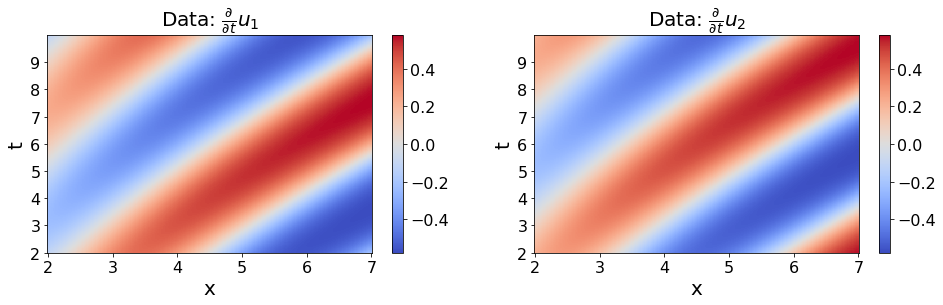

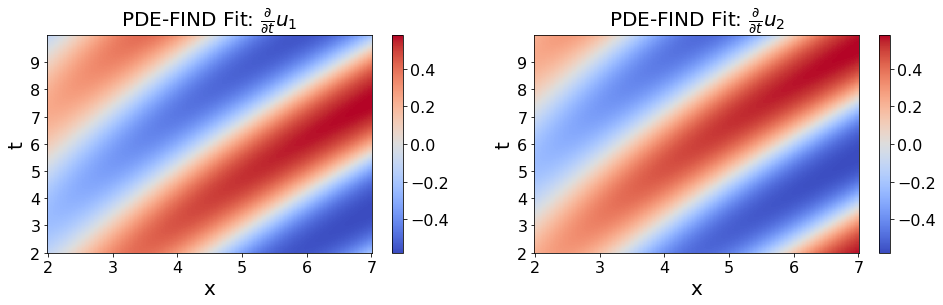

In [34]:
### Colorplots of the data

plt.figure(figsize=(16, 4))


plt.subplot(1, 2, 1)

plt.pcolormesh(xt_mshgrd, tx_mshgrd, u_dot[:,:,0].T, cmap='coolwarm' )

cb = plt.colorbar()
cb.ax.tick_params(labelsize=16)
plt.xlabel('x', fontsize=20)
plt.ylabel('t', fontsize=20)
ax = plt.gca()
plt.gca().set_title(r'Data: $\frac{\partial }{\partial t} u_1$', fontsize=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
# ax.set_xticks([])
# ax.set_yticks([])



plt.subplot(1, 2, 2)

plt.pcolormesh(xt_mshgrd, tx_mshgrd, u_dot[:,:,1].T, cmap='coolwarm' )

cb = plt.colorbar()
cb.ax.tick_params(labelsize=16)
plt.xlabel('x', fontsize=20)
plt.ylabel('t', fontsize=20)
ax = plt.gca()
plt.gca().set_title(r'Data: $\frac{\partial }{\partial t} u_2$', fontsize=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
# ax.set_xticks([])
# ax.set_yticks([])

plt.show()



### Colorplots of PDE-FIND fit

plt.figure(figsize=(16, 4))


plt.subplot(1, 2, 1)

plt.pcolormesh(xt_mshgrd, tx_mshgrd, u_dot_stlsq_tot[:,:,0].T, cmap='coolwarm', vmin=np.min(np.min(u_dot[:,:,0]) ), vmax=np.max(np.max(u_dot[:,:,0]) ) )

cb = plt.colorbar()
cb.ax.tick_params(labelsize=16)
plt.xlabel('x', fontsize=20)
plt.ylabel('t', fontsize=20)
ax = plt.gca()
plt.gca().set_title(r'PDE-FIND Fit: $\frac{\partial }{\partial t} u_1$', fontsize=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
# ax.set_xticks([])
# ax.set_yticks([])



plt.subplot(1, 2, 2)

plt.pcolormesh(xt_mshgrd, tx_mshgrd, u_dot_stlsq_tot[:,:,1].T, cmap='coolwarm', vmin=np.min(np.min(u_dot[:,:,1]) ), vmax=np.max(np.max(u_dot[:,:,1]) ) )

cb = plt.colorbar()
cb.ax.tick_params(labelsize=16)
plt.xlabel('x', fontsize=20)
plt.ylabel('t', fontsize=20)
ax = plt.gca()
plt.gca().set_title(r'PDE-FIND Fit: $\frac{\partial }{\partial t} u_2$', fontsize=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
# ax.set_xticks([])
# ax.set_yticks([])

plt.show()



In [35]:
### fodder



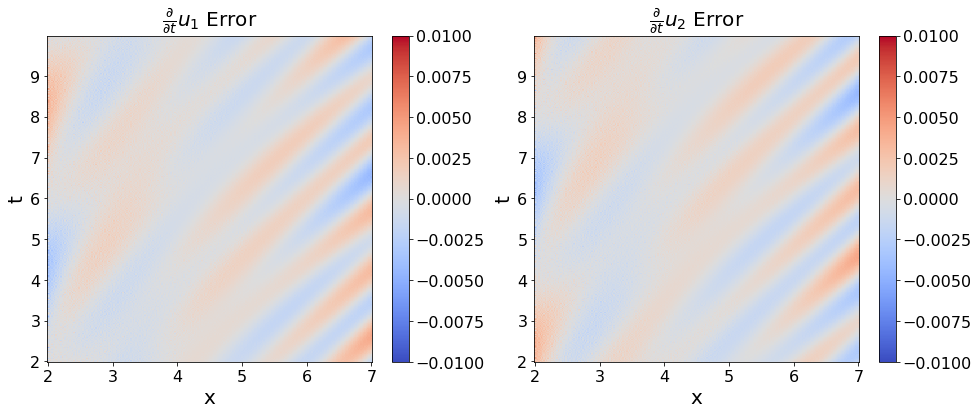

In [36]:
### Colorplots of the error


plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)

vminmax = 0.01

# 
plt.pcolormesh(xt_mshgrd, tx_mshgrd, u_dot_tot_err[:,:,0].T, cmap='coolwarm' , vmin = -vminmax , vmax = vminmax )

cb = plt.colorbar()
cb.ax.tick_params(labelsize=16)
plt.xlabel('x', fontsize=20)
plt.ylabel('t', fontsize=20)
ax = plt.gca()
plt.gca().set_title(r'$\frac{\partial }{\partial t} u_1$ Error', fontsize=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
# ax.set_xticks([])
# ax.set_yticks([])



plt.subplot(1, 2, 2)

# , vmin = -0.05 , vmax = 0.05
plt.pcolormesh(xt_mshgrd, tx_mshgrd, u_dot_tot_err[:,:,1].T, cmap='coolwarm' , vmin = -vminmax , vmax = vminmax )

cb = plt.colorbar()
cb.ax.tick_params(labelsize=16)
plt.xlabel('x', fontsize=20)
plt.ylabel('t', fontsize=20)
ax = plt.gca()
plt.gca().set_title(r'$\frac{\partial }{\partial t} u_2$ Error', fontsize=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
# ax.set_xticks([])
# ax.set_yticks([])



plt.show()



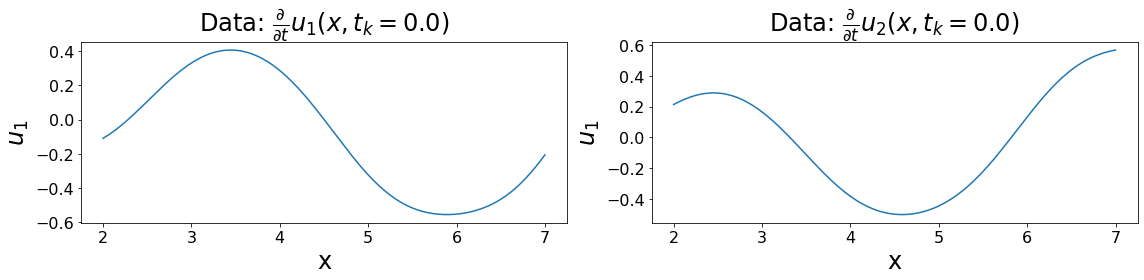

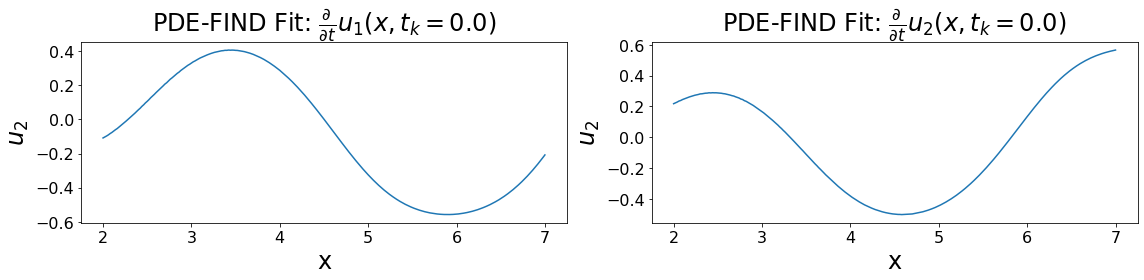

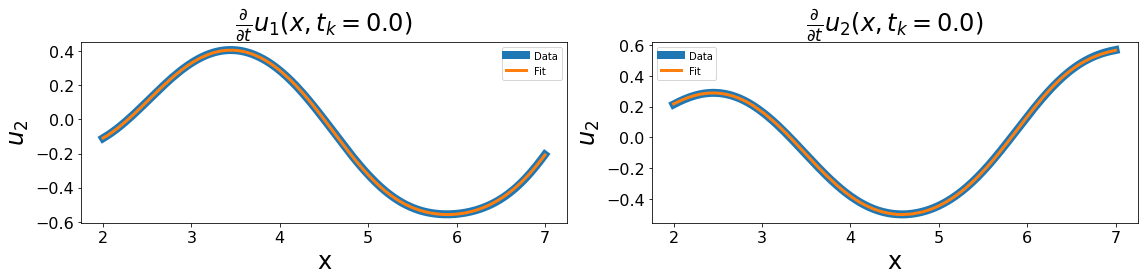

In [37]:


tplt = 0


plt.figure(figsize=(16, 4))

plt.subplot(1, 2, 1)
plt.plot( x_PF , u_dot[:,tplt,0])
plt.xlabel('x', fontsize=24)
plt.ylabel(r'$u_1$', fontsize=24)
ttl_str = r'Data: $\frac{\partial}{\partial t}u_1 (x, t_k = $' + str( np.round(t[tplt],2) ) + ')'
plt.title(ttl_str, fontsize=24)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.subplot(1, 2, 2)
plt.plot( x_PF , u_dot[:,tplt,1])
plt.xlabel('x', fontsize=24)
plt.ylabel(r'$u_1$', fontsize=24)
ttl_str = r'Data: $\frac{\partial}{\partial t}u_2 (x, t_k = $' + str( np.round(t[tplt],2) ) + ')'
plt.title(ttl_str, fontsize=24)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.tight_layout()
plt.show()



# tplt=

plt.figure(figsize=(16, 4))

plt.subplot(1, 2, 1)
plt.plot( x_PF , u_dot_stlsq_tot[:,tplt,0])
plt.xlabel('x', fontsize=24)
plt.ylabel(r'$u_2$', fontsize=24)
ttl_str = r'PDE-FIND Fit: $\frac{\partial}{\partial t}u_1 (x, t_k = $' + str( np.round(t[tplt],2) ) + ')'
plt.title(ttl_str, fontsize=24)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.subplot(1, 2, 2)
plt.plot( x_PF , u_dot_stlsq_tot[:,tplt,1])
plt.xlabel('x', fontsize=24)
plt.ylabel(r'$u_2$', fontsize=24)
ttl_str = r'PDE-FIND Fit: $\frac{\partial}{\partial t}u_2 (x, t_k = $' + str( np.round(t[tplt],2) ) + ')'
plt.title(ttl_str, fontsize=24)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)



plt.tight_layout()
plt.show()



plt.figure(figsize=(16, 4))

plt.subplot(1, 2, 1)

plt.plot( x_PF , u_dot[:,tplt,0] , label='Data' , linewidth = 8)
plt.plot( x_PF , u_dot_stlsq_tot[:,tplt,0] , label='Fit' , linewidth = 3)


plt.xlabel('x', fontsize=24)
plt.ylabel(r'$u_2$', fontsize=24)
ttl_str = r'$\frac{\partial}{\partial t}u_1 (x, t_k = $' + str( np.round(t[tplt],2) ) + ')'
plt.title(ttl_str, fontsize=24)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend()


plt.subplot(1, 2, 2)

plt.plot( x_PF , u_dot[:,tplt,1] , label='Data' , linewidth = 8)
plt.plot( x_PF , u_dot_stlsq_tot[:,tplt,1] , label='Fit' , linewidth = 3)


plt.xlabel('x', fontsize=24)
plt.ylabel(r'$u_2$', fontsize=24)
ttl_str = r'$\frac{\partial}{\partial t}u_2 (x, t_k = $' + str( np.round(t[tplt],2) ) + ')'
plt.title(ttl_str, fontsize=24)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend()


plt.tight_layout()
plt.show()



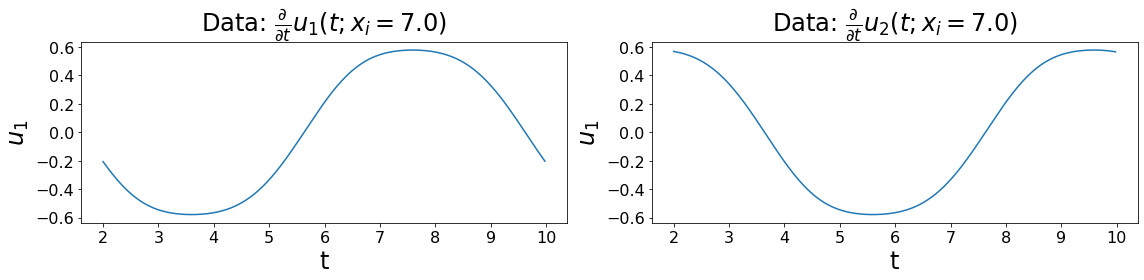

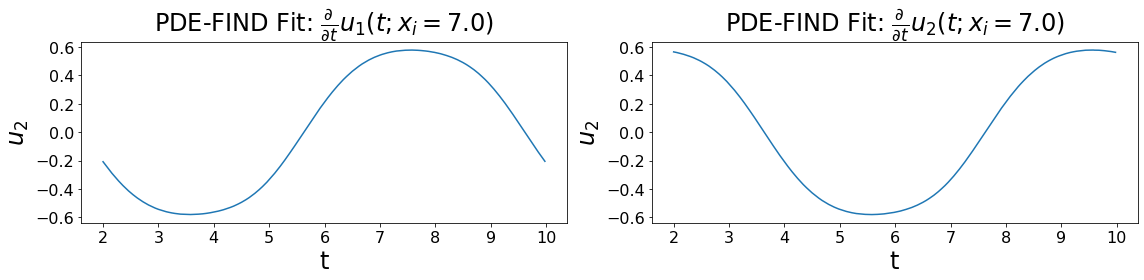

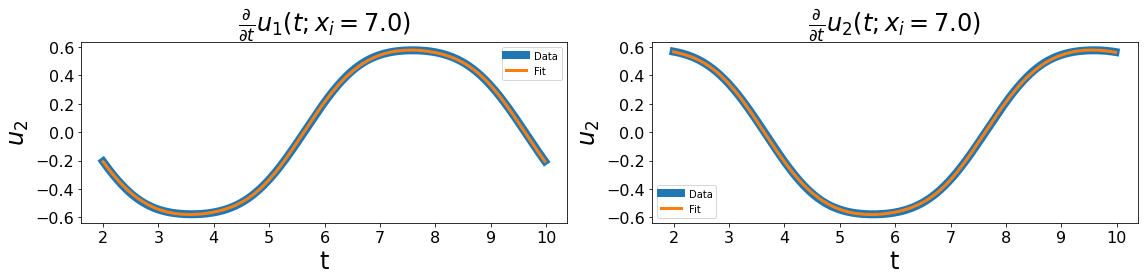

In [38]:

xplt = -1


plt.figure(figsize=(16, 4))

plt.subplot(1, 2, 1)
plt.plot( t_Ovlp , u_dot[xplt,:,0])
plt.xlabel('t', fontsize=24)
plt.ylabel(r'$u_1$', fontsize=24)
ttl_str = r'Data: $\frac{\partial}{\partial t}u_1 (t ; x_i = $' + str( np.round(x_PF[xplt],2) ) + ')'
plt.title(ttl_str, fontsize=24)
# ttl_str = r'Data: $\frac{\partial}{\partial t}u_1 (x, t_k = $' + str( np.round(t[tplt],2) ) + ')'
# plt.title(ttl_str, fontsize=24)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.subplot(1, 2, 2)
plt.plot( t_Ovlp , u_dot[xplt,:,1])
plt.xlabel('t', fontsize=24)
plt.ylabel(r'$u_1$', fontsize=24)
ttl_str = r'Data: $\frac{\partial}{\partial t}u_2 (t ; x_i = $' + str( np.round(x_PF[xplt],2) ) + ')'
plt.title(ttl_str, fontsize=24)
# ttl_str = r'Data: $\frac{\partial}{\partial t}u_2 (x, t_k = $' + str( np.round(t[tplt],2) ) + ')'
# plt.title(ttl_str, fontsize=24)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.tight_layout()
plt.show()





plt.figure(figsize=(16, 4))

plt.subplot(1, 2, 1)
plt.plot( t_Ovlp , u_dot_stlsq_tot[xplt,:,0])
plt.xlabel('t', fontsize=24)
plt.ylabel(r'$u_2$', fontsize=24)

ttl_str = r'PDE-FIND Fit: $\frac{\partial}{\partial t}u_1 (t ; x_i = $' + str( np.round(x_PF[xplt],2) ) + ')'
plt.title(ttl_str, fontsize=24)

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.subplot(1, 2, 2)
plt.plot( t_Ovlp , u_dot_stlsq_tot[xplt,:,1])
plt.xlabel('t', fontsize=24)
plt.ylabel(r'$u_2$', fontsize=24)

ttl_str = r'PDE-FIND Fit: $\frac{\partial}{\partial t}u_2 (t ; x_i = $' + str( np.round(x_PF[xplt],2) ) + ')'
plt.title(ttl_str, fontsize=24)

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)



plt.tight_layout()
plt.show()




plt.figure(figsize=(16, 4))

plt.subplot(1, 2, 1)

plt.plot( t_Ovlp , u_dot[xplt,:,0] , label='Data' , linewidth = 8)
plt.plot( t_Ovlp , u_dot_stlsq_tot[xplt,:,0] , label='Fit' , linewidth = 3)


plt.xlabel('t', fontsize=24)
plt.ylabel(r'$u_2$', fontsize=24)
ttl_str = r'$\frac{\partial}{\partial t}u_1 (t ; x_i = $' + str( np.round(x_PF[xplt],2) ) + ')'
plt.title(ttl_str, fontsize=24)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend()



plt.subplot(1, 2, 2)

plt.plot( t_Ovlp , u_dot[xplt,:,1] , label='Data' , linewidth = 8)
plt.plot( t_Ovlp , u_dot_stlsq_tot[xplt,:,1] , label='Fit' , linewidth = 3)


plt.xlabel('t', fontsize=24)
plt.ylabel(r'$u_2$', fontsize=24)
ttl_str = r'$\frac{\partial}{\partial t}u_2 (t ; x_i = $' + str( np.round(x_PF[xplt],2) ) + ')'
plt.title(ttl_str, fontsize=24)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend()



plt.tight_layout()
plt.show()




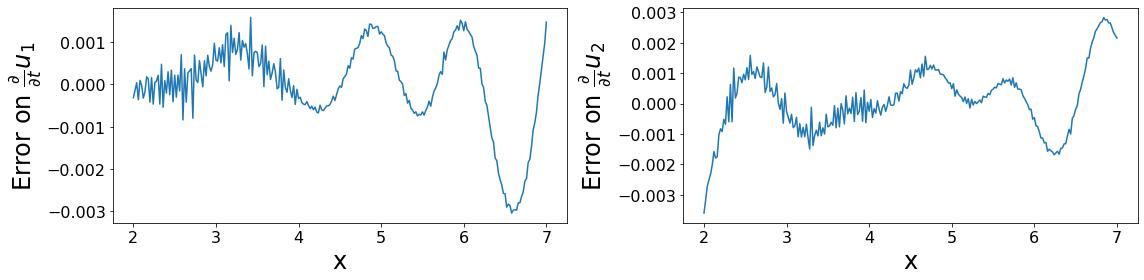

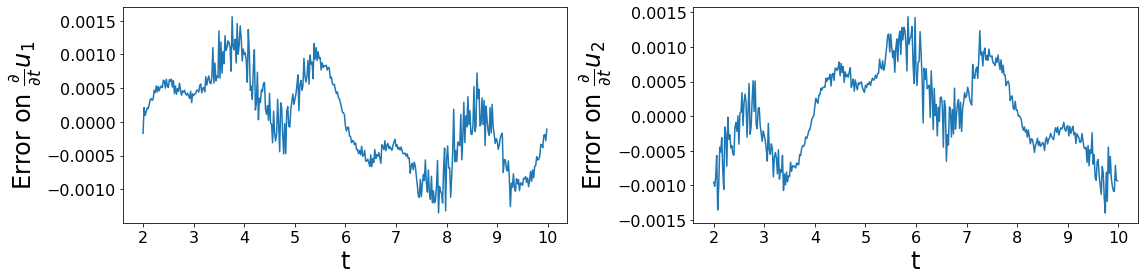

In [39]:


# tplt = 0
tplt = int( np.round( np.shape(u_dot_tot_err)[1] / 2 ) )

plt.figure(figsize=(16, 4))

plt.subplot(1, 2, 1)
plt.plot( x_PF , u_dot_tot_err[:,tplt,0])
plt.xlabel('x', fontsize=24)
plt.ylabel(r'Error on $\frac{\partial}{\partial t} u_1$', fontsize=24)
# ttl_str = r'PDE-FIND Fit: $\frac{\partial}{\partial t}u_1 (x, t_k = $' + str( np.round(t[tplt],2) ) + ')'
# plt.title(ttl_str, fontsize=24)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.subplot(1, 2, 2)
plt.plot( x_PF , u_dot_tot_err[:,tplt,1])
plt.xlabel('x', fontsize=24)
plt.ylabel(r'Error on $\frac{\partial}{\partial t} u_2$', fontsize=24)
# ttl_str = r'PDE-FIND Fit: $\frac{\partial}{\partial t}u_2 (x, t_k = $' + str( np.round(t[tplt],2) ) + ')'
# plt.title(ttl_str, fontsize=24)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)



plt.tight_layout()
plt.show()




# xplt = -1
xplt = int( np.round( np.shape(u_dot_tot_err)[0] / 2 ) )

plt.figure(figsize=(16, 4))

plt.subplot(1, 2, 1)
plt.plot( t_Ovlp , u_dot_tot_err[xplt,:,0])
plt.xlabel('t', fontsize=24)
plt.ylabel(r'Error on $\frac{\partial}{\partial t} u_1$', fontsize=24)
# ttl_str = r'PDE-FIND Fit: $\frac{\partial}{\partial t}u_1 (x, t_k = $' + str( np.round(t[tplt],2) ) + ')'
# plt.title(ttl_str, fontsize=24)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.subplot(1, 2, 2)
plt.plot( t_Ovlp , u_dot_tot_err[xplt,:,1])
plt.xlabel('t', fontsize=24)
plt.ylabel(r'Error on $\frac{\partial}{\partial t} u_2$', fontsize=24)
# ttl_str = r'PDE-FIND Fit: $\frac{\partial}{\partial t}u_2 (x, t_k = $' + str( np.round(t[tplt],2) ) + ')'
# plt.title(ttl_str, fontsize=24)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)



plt.tight_layout()
plt.show()




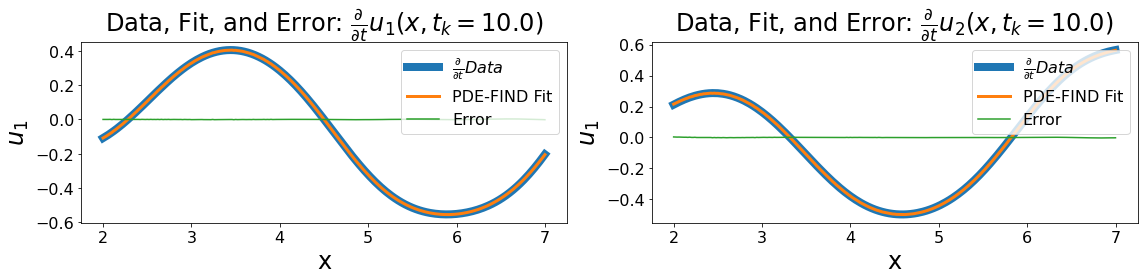

In [40]:


tplt = -1


plt.figure(figsize=(16, 4))

plt.subplot(1, 2, 1)

plt.plot( x_PF , u_dot[:,tplt,0], label=r'$\frac{\partial}{\partial t} Data$' , linewidth = 8)
plt.plot( x_PF , u_dot_stlsq_tot[:,tplt,0], label='PDE-FIND Fit' , linewidth = 3)
plt.plot( x_PF , u_dot_tot_err[:,tplt,0], label='Error')


plt.xlabel('x', fontsize=24)
plt.ylabel(r'$u_1$', fontsize=24)
ttl_str = r'Data, Fit, and Error: $\frac{\partial}{\partial t}u_1 (x, t_k = $' + str( np.round(t[tplt],2) ) + ')'
plt.title(ttl_str, fontsize=24)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(loc='upper right', fontsize=16)

plt.subplot(1, 2, 2)

plt.plot( x_PF , u_dot[:,tplt,1], label=r'$\frac{\partial}{\partial t} Data$' , linewidth = 8)
plt.plot( x_PF , u_dot_stlsq_tot[:,tplt,1], label='PDE-FIND Fit' , linewidth = 3)
plt.plot( x_PF , u_dot_tot_err[:,tplt,1], label='Error')


plt.xlabel('x', fontsize=24)
plt.ylabel(r'$u_1$', fontsize=24)
ttl_str = r'Data, Fit, and Error: $\frac{\partial}{\partial t}u_2 (x, t_k = $' + str( np.round(t[tplt],2) ) + ')'
plt.title(ttl_str, fontsize=24)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(loc='upper right', fontsize=16)

plt.tight_layout()
plt.show()



# # tplt=

# plt.figure(figsize=(16, 4))

# plt.subplot(1, 2, 1)
# plt.xlabel('x', fontsize=24)
# plt.ylabel(r'$u_2$', fontsize=24)
# ttl_str = r'PDE-FIND Fit: $\frac{\partial}{\partial t}u_1 (x, t_k = $' + str( np.round(t[tplt],2) ) + ')'
# plt.title(ttl_str, fontsize=24)
# plt.xticks(fontsize=16)
# plt.yticks(fontsize=16)

# plt.subplot(1, 2, 2)
# plt.xlabel('x', fontsize=24)
# plt.ylabel(r'$u_2$', fontsize=24)
# ttl_str = r'PDE-FIND Fit: $\frac{\partial}{\partial t}u_2 (x, t_k = $' + str( np.round(t[tplt],2) ) + ')'
# plt.title(ttl_str, fontsize=24)
# plt.xticks(fontsize=16)
# plt.yticks(fontsize=16)



# plt.tight_layout()
# plt.show()




In [41]:
#### FIGURES FOR PAPER
####
####


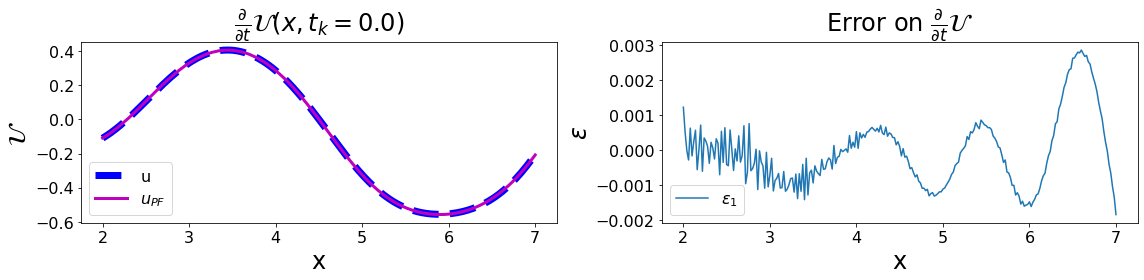

In [42]:
#### LINE PLOTS



tplt = 0
# tplt = int( np.round( np.shape(u_dot_tot_err)[1] / 2 ) )



plt.figure(figsize=(16, 4))


plt.subplot(1, 2, 1)
plt.plot( x_PF , u_dot[:,tplt,0] , 'b--' , linewidth = 7 , label='u' )
# plt.plot( x_PF , u_dot[:,tplt,1] , 'r--' , linewidth = 8 , label='v' )
plt.plot( x_PF , u_dot_stlsq_tot[:,tplt,0] , 'm' , linewidth = 3 , label='$u_{PF}$' )
# plt.plot( x_PF , u_dot_stlsq_tot[:,tplt,1] , 'c' , linewidth = 3 , label='$v_{PF}$' )

plt.xlabel('x', fontsize=24)
plt.ylabel(r'$\mathcal{U}$', fontsize=24)
ttl_str = r'$\frac{\partial}{\partial t}\mathcal{U} (x, t_k = $' + str( np.round(t[tplt],2) ) + ')'
plt.title(ttl_str, fontsize=24)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16 , loc='lower left' )


plt.subplot(1, 2, 2)
plt.plot( x_PF , u_dot_tot_err[:,tplt,0] , label='$\epsilon_1$')
# plt.plot( x_PF , u_dot_tot_err[:,tplt,1] , label='$\epsilon_2$')

plt.xlabel('x', fontsize=24)
plt.ylabel(r'$\epsilon$', fontsize=24)
ttl_str = r'Error on $\frac{\partial}{\partial t} \mathcal{U}$'
plt.title(ttl_str, fontsize=24)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16 , loc='lower left' )


plt.tight_layout()
plt.show()




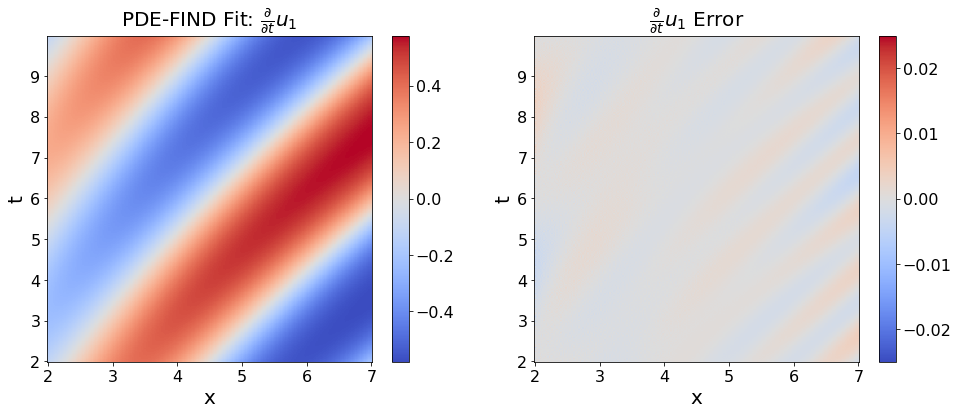

In [43]:
#### COLOR PLOTS



plt.figure(figsize=(16, 6))


plt.subplot(1, 2, 1)
ax = plt.gca()

vminmax = 0.75

### Plot the data
# plt.pcolormesh(xt_mshgrd, tx_mshgrd, u_dot[:,:,0].T, cmap='coolwarm' , vmin = -vminmax , vmax = vminmax )
# plt.gca().set_title(r'Data: $\frac{\partial }{\partial t} u_1$', fontsize=20)

### Plot the PDE-FIND fit
plt.pcolormesh(xt_mshgrd, tx_mshgrd, u_dot_stlsq_tot[:,:,0].T, cmap='coolwarm', vmin=np.min(np.min(u_dot[:,:,0]) ), vmax=np.max(np.max(u_dot[:,:,0]) ) )
plt.gca().set_title(r'PDE-FIND Fit: $\frac{\partial }{\partial t} u_1$', fontsize=20)


cb = plt.colorbar()
cb.ax.tick_params(labelsize=16)
plt.xlabel('x', fontsize=20)
plt.ylabel('t', fontsize=20)

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)


plt.subplot(1, 2, 2)
vminmax = 0.025
plt.pcolormesh(xt_mshgrd, tx_mshgrd, u_dot_tot_err[:,:,0].T, cmap='coolwarm' , vmin = -vminmax , vmax = vminmax )

cb = plt.colorbar()
cb.ax.tick_params(labelsize=16)
plt.xlabel('x', fontsize=20)
plt.ylabel('t', fontsize=20)
ax = plt.gca()
plt.gca().set_title(r'$\frac{\partial }{\partial t} u_1$ Error', fontsize=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)


plt.show()


